# MNIST Datensatz handgeschriebener Ziffern 0-9

### Importieren von TensorFlow, Keras und Numpy

Neue Bibliotheken für diese Art der Datenanalyse: TensorFlow und Keras.
Keras bietet eine einfache Möglichkeit den MNIST-Datensatz zu laden, da dieser bereits als Benchmark-Datensatz in Keras integriert ist.

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam ,RMSprop
import seaborn as sns

### MNIST Datensatz laden

Trainingsdaten (Bilder + Label) und Testdaten (ebenso Bilder + Label)

In [2]:
# Datensatz angeben
data = keras.datasets.mnist

# Datensatz herunterladen, Aufteilen der Daten in Test- und Trainingsdaten
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [3]:
# Größe der Trainingsdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print('Training-Datensatz: ', train_images.shape)
# Größe der Testdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print('Test-Datensatz: ', test_images.shape)
# Informationsinhalte der Daten
print(f"Pixelwerte von {np.min(train_images)} bis {np.max(train_images)}.")

Training-Datensatz:  (60000, 28, 28)
Test-Datensatz:  (10000, 28, 28)
Pixelwerte von 0 bis 255.


In [4]:
train_labels[10]

3

### Bilder aus dem Datensatz anzeigen


In [14]:
import matplotlib.pyplot as plt
# Magischer Befehl für die Verwendung von matplotlib in lokalen jupyter notebooks
%matplotlib inline

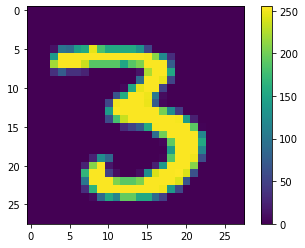

In [42]:
plt.imshow(train_images[12])
plt.colorbar()
plt.show()

In [7]:
normalized_train_images = train_images / 255

### Pre-Processing für die Verwendung von Keras


Alle Bilder haben ein Label, die Zuordnung zur der auf dem Bild dargestellten Zahl (z.B. 3). Die Ausgabe des ANN ist aber ein Vektor aus 10 Elementen (0-9), an dessen 4. Stelle eine 1 stehen muss, um die Zahl 3 zu codieren.

In [5]:
# Label ist die Zahl der Klasse
print(f"Label davor: {train_labels[10]}")

total_classes = 10
# Hilfsfunktion zur Durchführung der Vektorisierung
train_vec_labels = keras.utils.to_categorical(train_labels, total_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, total_classes)
print(f"Label danach: {train_vec_labels[10]}")

Label davor: 3
Label danach: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Entwurf eines verbesserten Netzes

* sehr einfaches Netz mit 3 Layern definieren (Eingabelayer, Hidden Layer und Ausgabelayer)
* Input-Layer: keras.layers.Flatten Layer, der die 28x28 Matrizen auf  Neuronen verteilt
* Hidden-Layer: keras.layers.Dense Layer mit 256 Neuronen, Aktivierungsfunktion treppenartig "sigmoidal"
* Output-Layer: keras.layers.Dense Layer mit 10 Neuronen, 10 Klassen (Ziffern von 0-9)

In [34]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation ='sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Kompilieren des Models

* Parameter für die Trainingsphase festlegen
    * optimizer: Verbesserungsalgorithmus beim Lernen RMSprop
    * Kostenfunktion: Mittlere Quadratische Abweichung
    * Metrik: Accuracy

In [36]:
# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss='mean_squared_error',
    metrics=['accuracy'])

# Trainieren des Modells

10 Epochen = 10 Iterationen

In [37]:
model1 = model.fit(train_images, train_vec_labels, epochs=10, verbose=True)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0226 - accuracy: 0.8735
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0134 - accuracy: 0.9222
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0115 - accuracy: 0.9336
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0104 - accuracy: 0.9393
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0095 - accuracy: 0.9442
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - accuracy: 0.9478
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0088 - accuracy: 0.9487
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0082 - accuracy: 0.9516
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0079 - accuracy: 0.9535
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.007

# Modell evaluieren

In [38]:
eval_loss, eval_accuracy = model.evaluate(test_images, test_vec_labels, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.95


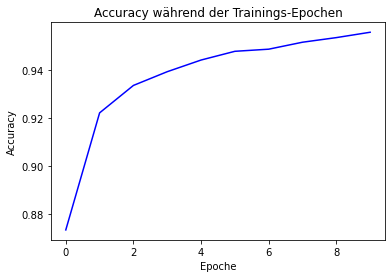

In [39]:
# Plot der Fehlerabnahme
plt.plot(model1.history['accuracy'], color='b')
plt.title("Accuracy während der Trainings-Epochen")
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
#plt.legend()
plt.show()

## Anwenden des Modells und Ergebnis-Evaluierung

313/313 [==============================] - 1s 2ms/step


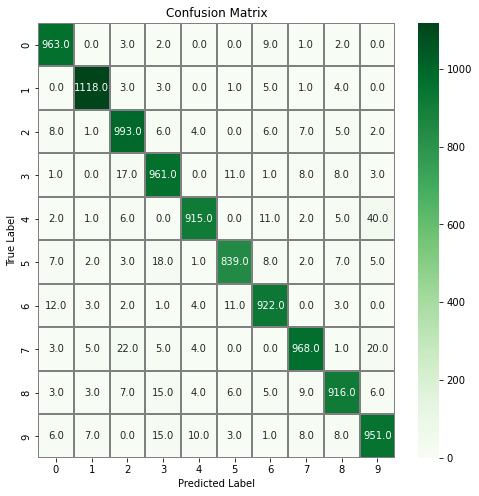

In [40]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_pred_classes
cm=confusion_matrix(test_labels,y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Wie sehen fehlerhaft erkannte Zahlen aus?

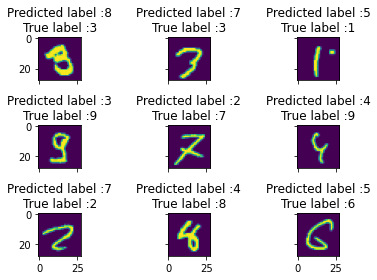

In [41]:
# Fehler sind Unterschiede zwischen y_pred labels and den wahren labels
errors = (y_pred_classes - test_labels != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
test_labels_errors = test_labels[errors]
test_images_errors = test_images[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    
    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    fig.tight_layout()

# Wahrscheinlichkeit der falsch erkannten Zahl
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Vorhergesagte Wahrscheinlichkeit der wahren Zahl
true_prob_errors = np.diagonal(np.take(y_pred_errors, test_labels_errors, axis=1))

# Differenz der Wahrscheinlichkeiten
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sortieren der Differenzen
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 9 auswählen 
most_important_errors = sorted_delta_errors[-9:]
display_errors(most_important_errors, test_images_errors, y_pred_classes_errors, test_labels_errors)

# Even better, but there is still room for improvement! 
